# Image augmentation strategies:

## Author: Dr. Rahul Remanan 
### (CEO and Chief Imagination Officer, [Moad Computer](https://www.moad.computer))

### Demo data: [Kaggle Cats Vs. Dogs Redux](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition)

### [Launch this notebook in Google Colab](https://colab.research.google.com/github/rahulremanan/HIMA/blob/master/examples/Notebooks/01_Image_augmentation/Image_augmentation_CoLab.ipynb)

## Download data into CoLab instance:

In [1]:
! pip3 install kaggle

In [2]:
from google.colab import files

uploaded = files.upload() 

Saving kaggle.json to kaggle.json


In [0]:
! mkdir ~/.kaggle/

In [0]:
! mv *.json ~/.kaggle/

In [5]:
! ls ~/.kaggle/

kaggle.json


In [6]:
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 94% 254M/271M [00:01<00:00, 166MB/s]
100% 271M/271M [00:01<00:00, 193MB/s]
 99% 538M/544M [00:04<00:00, 188MB/s]
100% 544M/544M [00:04<00:00, 133MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 99.8MB/s]


In [0]:
! rm ~/.kaggle/kaggle.json

In [0]:
! mkdir ./data
! mkdir ./data/train
! mkdir ./data/train/cats
! mkdir ./data/train/dogs
! mkdir ./data/preview
! mkdir ./data/validation
! mkdir ./data/validation/cats/
! mkdir ./data/validation/dogs/

In [10]:
!ls ./data/

preview  train	validation


In [0]:
! mv ./*.zip ./data/

In [0]:
! unzip -q ./data/train.zip -d ./data/train/

## Label training data:

In [0]:
! mv ./data/train/train/cat.* ./data/train/cats/
! mv ./data/train/train/dog.* ./data/train/dogs/

In [0]:
! ls ./data/train/train/

In [0]:
! rm -r ./data/train/train

In [16]:
! ls ./data/train/dogs/ -1 | wc -l

12500


In [17]:
! ls ./data/train/cats/ -1 | wc -l

12500


## Create train-validation split:

In [0]:
! cd ./data/train/cats/ ; shuf -n 500 -e * | xargs -i mv {} ../../../data/validation/cats/

In [0]:
! cd ./data/train/dogs/ ; shuf -n 500 -e * | xargs -i mv {} ../../../data/validation/dogs/

In [20]:
! ls ./data/train/cats/ -1 | wc -l

12000


In [21]:
! ls ./data/train/dogs/ -1 | wc -l

12000


In [22]:
! ls ./data/validation/cats/ -1 | wc -l

500


In [23]:
! ls ./data/validation/dogs/ -1 | wc -l

500


In [0]:
! mkdir ./model/

## Part 01 - [Using Keras pre-processing:](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

### Why perform image augmentation?

In order to make the most out of our few training image data, the process of "augmentation" of these images via a number of random transformations is helpful. This process feed the data to the neural network model, so that it would never see twice the exact same picture. The key advantage of implementation such an augmentation strategy is to help prevent overfitting and better generalization by the trained model.

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class. This class allows you to:

* configure random transformations and normalization operations to be done on your image data during training
* instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs, fit_generator, evaluate_generator and predict_generator.

### Example implementation of image augmentation in Keras:

In [25]:
try:
    import warnings
    warnings.filterwarnings('ignore')
    from keras.preprocessing.image import ImageDataGenerator
except:
    print ("Please install Keras (cmd: $sudo pip3 install keras) to run this notebook ...")

Using TensorFlow backend.


### [Image data preprocessing using Keras generators](https://keras.io/preprocessing/image/)

In [0]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='nearest')

### Image Augmentation in Keras -- Quick start:

For more information, see the [documentation](https://keras.io/preprocessing/image/).

* rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
* rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
* shear_range is for randomly applying [shearing transformations](https://en.wikipedia.org/wiki/Shear_mapping)
* zoom_range is for randomly zooming inside pictures
* horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [0]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             channel_shift_range=0.2,
                             fill_mode='nearest')

In [29]:
import os, random
random_image = random.choice(os.listdir('./data/train/cats/'))

img = load_img(os.path.join('./data/train/cats/' + str(random_image)))
print ('Loaded image for preview : ' + str(random_image))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)  
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='./data/preview/', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 25:
        break

Loaded image for preview : cat.4776.jpg


In [0]:
x = img_to_array(img)

In [31]:
x.shape

(374, 499, 3)

### Keras pre-processing overview:

* The load_img uses Pillow, a complete fork of PIL. This creates a PIL image.
* The img_to_array creates a Numpy array with shape (3, 150, 150).
* The reshape command creates a Numpy array with shape (1, 3, 150, 150).
* The .flow() command below generates batches of randomly transformed images and saves the results to the `../data/cats_dogs/preview/` directory
* The break function prevents the loop from iterating indefinitely.

In [0]:
import os
import matplotlib.image as mpl_image
import matplotlib.pyplot as plt
from IPython.display import Image as PyImage

In [0]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = mpl_image.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [0]:
def stack_plot(stack_size, folder):
    rows, cols = stack_size, stack_size
    fig,ax = plt.subplots(rows,cols,figsize=[24,24])
    i = 0
    try:
        for filename in os.listdir(folder):
            img = mpl_image.imread(os.path.join(folder, filename))
            ax[int(i/rows),int(i % rows)].imshow(img)
            ax[int(i/rows),int(i % rows)].axis('off')
            i += 1
    except:
        print ("Failed to add an image to the stacked plot ...")
    plt.show()

### Plotting augmented images:

* Using matplotlib library.
* The load_images function return a Numpy array of all the images in the folder specified in the function.
* The stack_plot generates a stack of images contained inside a specific folder of size: stack_size*stack_size

Failed to add an image to the stacked plot ...


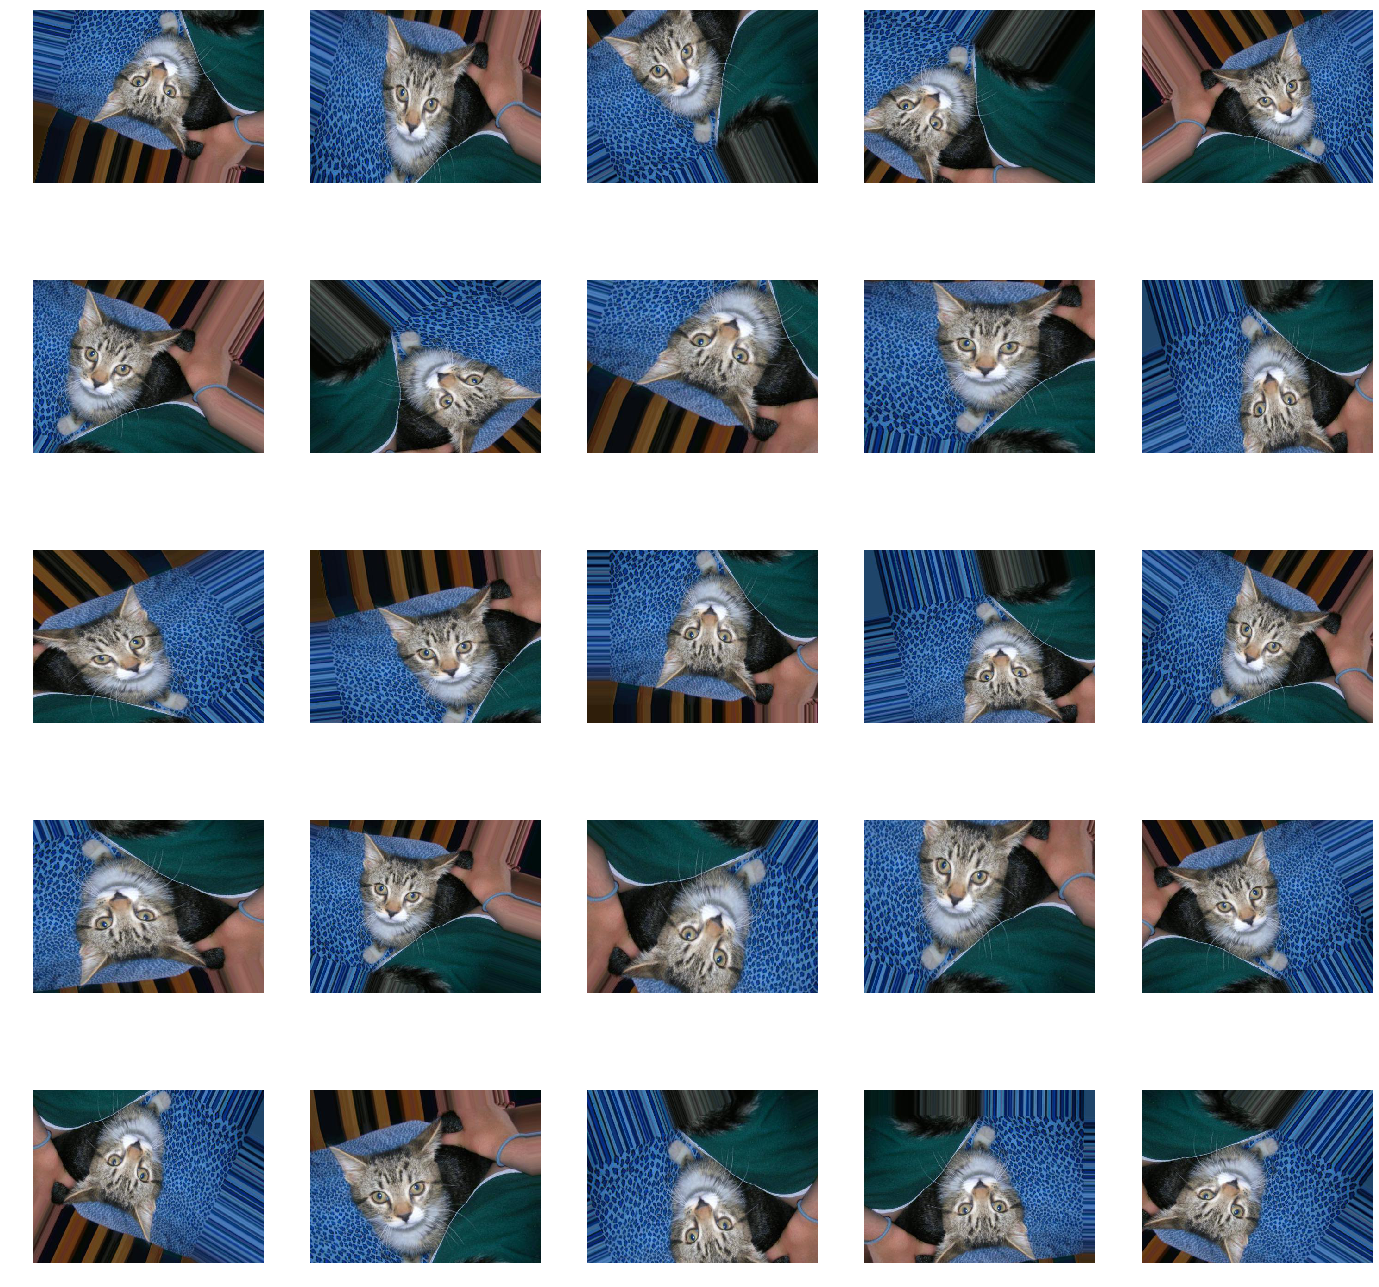

In [35]:
stack_plot(5, './data/preview/')

## Part 02 - Implementing a convolutional neural network that uses image augmentation:

### Importing dependent libraries:

In [0]:
try:
    import keras
    from keras.preprocessing.image import ImageDataGenerator
    from keras.models import Sequential
    from keras.layers import Conv2D, MaxPooling2D
    from keras.layers import Activation, Dropout, Flatten, Dense
    from keras import backend as K
except:
    print ("Failed to load Keras modules. Verify if dependency requirements are satisfied ...")

* Importing preprocessing.image and models functions from Keras
* Importing layers function
* Importing keras backend

### Initialize some variables:

In [0]:
img_width, img_height = 150, 150

train_data_dir = './data/train/'
validation_data_dir = './data/validation/'

nb_train_samples = 24000
nb_validation_samples = 1000

epochs = 5
batch_size = 16

In [0]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

* Using img_width, img_height variables for specifying the dimensions of images to be consumed by the neural network
* Initilaizing variables for location pointers to training data, validation data, train data sample size, validation data sample size, number of training epochs, number of images to be processed in each batch
* Specifying a function to adjust input shape of the tensor if the image RGB data format is channels first or channels last

### Build and compile a neural network:

* Building a neural network model using the Sequential format in Keras
* Compile the model using binary cross entropy as the loss function, RMSProp as the optimizer and accuracy as the evaluation metrics

In [39]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Configuring data generators to process and feed the data to the neural network:

In [0]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

* The image augmentation configuration for training

In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

* Image augmentation configuration to be used for testing
* This generator uses only rescaling

### Creating train and validation generators:

In [43]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

Found 24000 images belonging to 2 classes.


In [44]:
validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


### Download pre-trained weights file:

In [45]:
! wget https://github.com/rahulremanan/HIMA/raw/master/examples/Notebooks/01_Image_augmentation/weights/first_try.h5

--2019-04-21 18:43:13--  https://github.com/rahulremanan/HIMA/raw/master/examples/Notebooks/01_Image_augmentation/weights/first_try.h5
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/rahulremanan/HIMA/master/examples/Notebooks/01_Image_augmentation/weights/first_try.h5 [following]
--2019-04-21 18:43:13--  https://media.githubusercontent.com/media/rahulremanan/HIMA/master/examples/Notebooks/01_Image_augmentation/weights/first_try.h5
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 989080 (966K) [application/octet-stream]
Saving to: ‘first_try.h5’

first_try.h5       

In [0]:
! mv ./first_try.h5 ./model/

###[ Loading saved model weights file using Keras](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model):

In [47]:
model_path = './model/first_try.h5'
lr = 1e-6

import keras

if os.path.exists(model_path):
  model.load_weights(model_path)
  print ('Loaded saved weights file ...')

Loaded saved weights file ...


### Creating a model fit generator function for training the neural network:

In [48]:
model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                               min_delta=0, 
                                                               patience=10, 
                                                               verbose=0, 
                                                               mode='min'),
                                 keras.callbacks.ModelCheckpoint(model_path,
                                                                 monitor='val_loss', 
                                                                 save_best_only=True, 
                                                                 mode='min', 
                                                                 verbose=0),
                                 keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                                                   patience=2,
                                                                   mode = 'max',
                                                                   min_delta=1e-4, 
                                                                   cooldown=1,
                                                                   verbose=1, 
                                                                   factor=0.5, 
                                                                   min_lr=lr*1e-4)])

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1500/1500 [==============================] - 220s 147ms/step - loss: 0.3517 - acc: 0.8507 - val_loss: 0.3010 - val_acc: 0.8619
Epoch 2/5
1500/1500 [==============================] - 213s 142ms/step - loss: 0.3208 - acc: 0.8644 - val_loss: 0.2935 - val_acc: 0.8699
Epoch 3/5
1500/1500 [==============================] - 215s 144ms/step - loss: 0.2990 - acc: 0.8730 - val_loss: 0.3043 - val_acc: 0.8648
Epoch 4/5
1500/1500 [==============================] - 211s 140ms/step - loss: 0.2852 - acc: 0.8810 - val_loss: 0.2317 - val_acc: 0.9004
Epoch 5/5
1500/1500 [==============================] - 216s 144ms/step - loss: 0.2680 - acc: 0.8880 - val_loss: 0.2658 - val_acc: 0.8933


### Saving model weights at the end of the training session:

In [0]:
model.save_weights(model_path)

In [50]:
! ls ./model/

first_try.h5


In [0]:
from google.colab import files
files.download(model_path)

## Part 03 - Improving classification accuracy of a neural network using transfer learning:

### Importing dependent libraries:

In [0]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

### Defining and initializing variables:

In [0]:
top_model_weights_path = './model/bottleneck_fc_model.h5'
train_data_dir = './data/train'
validation_data_dir = './data/validation'
bottleneck_train_path = './model/bottleneck_features_train.npy'
bottleneck_val_path = './model/bottleneck_features_validation.npy'

nb_train_samples = 24000
nb_validation_samples = 1000

epochs = 2
batch_size = 10

### Specify the dimensions of images:

In [0]:
img_width, img_height = 150, 150

### Build the VGG16 network:

In [55]:
model = applications.VGG16(include_top=False, weights='imagenet', input_shape = (img_width, img_height,3))

58892288/58889256 [==============================] - 1s 0us/step


### Define data generator:

In [0]:
datagen = ImageDataGenerator(rescale=1. / 255)

### Creating a function to save bottleneck features:

In [0]:
def save_bottlebeck_features(bottleneck_path=None,
                             data_dir = None,
                             nb_samples=None,
                             batch_size = None):
    generator = datagen.flow_from_directory(data_dir,
                                            target_size=(img_width, img_height),
                                            batch_size=batch_size,
                                            class_mode="binary",
                                            shuffle=False)
    
    bottleneck_features = model.predict_generator(generator, nb_samples // batch_size)
    
    np.save((bottleneck_path),
            bottleneck_features)

### Saving bottleneck features:

In [58]:
save_bottlebeck_features(bottleneck_path=bottleneck_train_path,
                             data_dir = train_data_dir,
                             nb_samples = nb_train_samples,
                             batch_size = batch_size)

Found 24000 images belonging to 2 classes.


In [59]:
save_bottlebeck_features(bottleneck_path = bottleneck_val_path,
                         data_dir = validation_data_dir,
                         nb_samples = nb_validation_samples,
                         batch_size = batch_size)

Found 1000 images belonging to 2 classes.


### Creating a function to train the top model:

In [0]:
def train_top_model(save_path=None, bottleneck_train_path = None, bottleneck_val_path = None):
    top_model_weights_path = save_path
    train_data = np.load(open(bottleneck_train_path, 'rb'))
    train_labels = np.array([0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    validation_data = np.load(open(bottleneck_val_path, 'rb'))
    validation_labels = np.array([0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    
    model.save_weights(top_model_weights_path)

### Intialize trainig session of the top model and save weights at the end of training:

In [62]:
train_top_model(save_path=top_model_weights_path,              \
                bottleneck_train_path = bottleneck_train_path, \
                bottleneck_val_path = bottleneck_val_path)

Train on 24000 samples, validate on 1000 samples
Epoch 1/2
24000/24000 [==============================] - 10s 408us/step - loss: 0.3778 - acc: 0.8526 - val_loss: 0.2541 - val_acc: 0.9070
Epoch 2/2
24000/24000 [==============================] - 10s 396us/step - loss: 0.2944 - acc: 0.8893 - val_loss: 0.2400 - val_acc: 0.9130


### Fine tuning the model:

#### Load dependent libraries:

In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

#### Specify dimensions of the images:

In [0]:
img_width, img_height = 150, 150

#### Load model weights:

In [0]:
weights_path = './model/vgg16_weights.h5'
top_model_weights_path = './model/bottleneck_fc_model.h5'

#### Initialize some variables:

In [0]:
train_data_dir = './data/train'
validation_data_dir = './data/validation'

nb_train_samples = 20000
nb_validation_samples = 5000

epochs = 50
batch_size = 16

checkpointer_savepath = './model/checkpointer.h5'

#### Build the VGG16 network:

In [67]:
model = Sequential()
model.add(applications.VGG16(weights='imagenet', include_top=False, input_shape = (img_width, img_height,3)))
print('Model loaded ...')

Model loaded ...


#### Build a classifier model to put on top of the V6616 convolutional model:

In [0]:
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

#### Generate model summary:

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [70]:
top_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [71]:
! apt-get install -y graphviz libgraphviz-dev && pip3 install pydot graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 6 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]


In [0]:
from keras.utils import plot_model 
import pydot 
import graphviz # apt-get install -y graphviz libgraphviz-dev && pip3 install pydot graphviz 
from IPython.display import SVG 
from keras.utils.vis_utils import model_to_dot

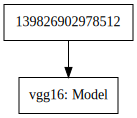

In [73]:
output_dir = './model'
plot_model(model, to_file= output_dir + '/model_top.png') 
SVG(model_to_dot(model).create(prog='dot', format='svg'))

#### Load model weights:
* It is necessary to start with a fully-trained classifier
* This includes the top classifier
* Initializing model weights from zero may not train the train the network successfully

In [0]:
top_model.load_weights(top_model_weights_path)

#### Add top model to the Vgg16 convolutional base:

In [0]:
model.add(top_model)

#### Generate sumary with base VGG16 model:

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 2097665   
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


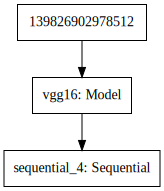

In [77]:
output_dir = './model'
plot_model(model, to_file= output_dir + '/model_full.png') 
SVG(model_to_dot(model).create(prog='dot', format='svg'))

#### Freezing layers:

* Freeze the first 25 layers, up to the last conv block
* Weighhts become non-trainable and will not be updated

In [0]:
for layer in model.layers[:25]:
    layer.trainable = False

#### Compile the model:

* With a SGD/momentum optimizer
* Very slow learning rate.

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-6),
              metrics=['accuracy'])

In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 2097665   
Total params: 16,812,353
Trainable params: 0
Non-trainable params: 16,812,353
_________________________________________________________________


#### Prepare data augmentation configuration:

In [0]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

#### Create generator functions to handle data:

In [85]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

Found 24000 images belonging to 2 classes.


In [86]:
validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


#### Implement a checkpoiting mechanism:

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint(checkpointer_savepath,\
                               verbose=1,\
                               save_best_only=True)
reduceLR = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', 
                                             patience=2,
                                             mode = 'max',
                                             min_delta=1e-4, 
                                             cooldown=1,
                                             verbose=1, 
                                             factor=0.5, 
                                             min_lr=lr*1e-4)

#### Load saved model:

In [0]:
from keras.models import Model, load_model

In [0]:
load_from_checkpoint = True
load_from_config = False
load_model_weights = False

In [0]:
import os

if load_from_checkpoint == True and os.path.exists(checkpointer_savepath):
    model = load_model(checkpointer_savepath)
elif load_from_config == True:
    model = load_prediction_model(args)
    model = load_prediction_model_weights(args)
elif load_model_weights == True:
    try:
        model = load_prediction_model_weights(args)
    except:
        print ("An exception has occurred, while loading model weights ...")
else:
    model = model

#### Train the model:

In [0]:
model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    callbacks=[early_stopper, checkpointer, reduceLR])

Epoch 1/50
1250/1250 [==============================] - 196s 157ms/step - loss: 0.3247 - acc: 0.8729 - val_loss: 0.2403 - val_acc: 0.9129

Epoch 00001: val_loss improved from inf to 0.24030, saving model to ./model/checkpointer.h5
Epoch 2/50
1250/1250 [==============================] - 198s 158ms/step - loss: 0.3340 - acc: 0.8721 - val_loss: 0.2375 - val_acc: 0.9134

Epoch 00002: val_loss improved from 0.24030 to 0.23750, saving model to ./model/checkpointer.h5
Epoch 3/50
1250/1250 [==============================] - 196s 157ms/step - loss: 0.3302 - acc: 0.8746 - val_loss: 0.2408 - val_acc: 0.9132

Epoch 00003: val_loss did not improve from 0.23750
Epoch 4/50
1250/1250 [==============================] - 196s 157ms/step - loss: 0.3241 - acc: 0.8765 - val_loss: 0.2414 - val_acc: 0.9128

Epoch 00004: val_loss did not improve from 0.23750

Epoch 00004: ReduceLROnPlateau reducing learning rate to 4.999999987376214e-07.
Epoch 5/50
1040/1250 [=======================>......] - ETA: 30s - loss: 

In [0]:
model.output_shape[1:]

#### Save the model:

In [0]:
model.save_weights('./model/vgg16_tl.h5')

In [0]:
from google.colab import files

In [0]:
files.download('./model/vgg16_tl.h5')

In [0]:
! ls ./model/

In [0]:
files.download('./model/bottleneck_fc_model.h5')

In [0]:
files.download('./model/bottleneck_features_train.npy')

In [0]:
files.download('./model/bottleneck_features_validation.npy')

In [0]:
files.download('./model/first_try.h5')

## Part 04 - [Using radial image transformation:](https://arxiv.org/abs/1708.04347)

Deep learning models have a large number of free parameters that must be estimated by efficient training of the models on a large number of training data samples to increase their generalization performance. In real-world applications, the data available to train these networks is often limited or imbalanced. Hojjat Salehinejad et.al  propose a sampling method based on the radial transform in a polar coordinate system for image augmentation. This facilitates the training of deep learning models from limited source data. The pixel-wise transformation implemeted here provides representations of the original image in the polar coordinate system by generating a new image from each pixel. This technique can generate radial transformed images up to the number of pixels in the original image to increase the diversity of poorly represented image classes. Our experiments show improved generalization performance in training deep convolutional neural networks using these radial transformed images. 

In [0]:
from skimage import data
from skimage import io
import numpy as np
import math
import matplotlib.pyplot as plt

In [0]:
def to_gray(img):
    w, h,_ = img.shape
    ret = np.empty((w, h), dtype=np.uint8)
    retf = np.empty((w, h), dtype=np.float)
    imgf = img.astype(float)
    retf[:, :] = ((imgf[:, :, 1] + imgf[:, :, 2] + imgf[:, :, 0])/3)
    ret = retf.astype(np.uint8)
    return ret

In [0]:
def radial_transform(img,w,h):
    shape = im.shape

    new_im = np.zeros(shape)
    print(shape)
    print(len(shape))
    print('w',w)
    print('h',h)
    width = shape[1]
    height = shape[0]
    lens = len(shape)
    for i in range(0,width):
	    xita = 2*3.14159*i/width
	    for a in range(0,height):
		    x = (int)(math.floor(a * math.cos(xita)))
		    y = (int)(math.floor(a * math.sin(xita)))
		    new_y = (int)(h+x)
		    new_x = (int)(w+y)
		    #print(h.dtype)
		    if new_x>=0 and new_x<width:
			    if new_y>=0 and new_y<height:
				    if lens==3:
					    new_im[a,i,0] = (im[new_y,new_x,0]-127.5)/128
					    new_im[a,i,1] = (im[new_y,new_x,1]-127.5)/128
					    new_im[a,i,2] = (im[new_y,new_x,2]-127.5)/128
				    else:
					    new_im[a,i] = (im[new_y,new_x]-127.5)/128
					    new_im[a,i] = (im[new_y,new_x]-127.5)/128
					    new_im[a,i] = (im[new_y,new_x]-127.5)/128
    return new_im

In [0]:
! ls ./data/preview/

In [0]:
import os, random
random_image = random.choice(os.listdir('./data/preview/'))

im = io.imread(os.path.join('./data/preview/' + str(random_image)))
print ("Applying radial image transformation on image: " + str(random_image))
im = to_gray(im)
h = im.shape[0]
w = im.shape[1]

In [0]:
rt_im1 = radial_transform(im,(int)(w/2),(int)(h/2))
rt_im2 = radial_transform(im,(int)(w/4),(int)(h/4))
rt_im3 = radial_transform(im,(int)(w*0.5),(int)(h*0.75))

In [0]:
! mkdir ./data/preview/radial_transform/

In [0]:
io.imshow(im)
io.imsave('./data/preview/radial_transform/112.jpg',im)
io.imsave('./data/preview/radial_transform/112_1.jpg',rt_im1)
io.imsave('./data/preview/radial_transform/112_2.jpg',rt_im2)
io.imsave('./data/preview/radial_transform/112_3.jpg',rt_im3)
io.show()

In [0]:
plt.figure(num='cats_dogs',figsize=(8,8))  

plt.subplot(2,2,1)     
plt.title('Input image')  
plt.imshow(im,plt.cm.gray)      

plt.subplot(2,2,2)    
plt.title('Radial image transformation by: 0.5')  
plt.imshow(rt_im1,plt.cm.gray)     
plt.axis('off')    

plt.subplot(2,2,3)    
plt.title('Radial image transformation by: 0.25')  
plt.imshow(rt_im2,plt.cm.gray)     
plt.axis('off')    

plt.subplot(2,2,4)    
plt.title('Radial image transformation by: 0.75')  
plt.imshow(rt_im3,plt.cm.gray)     
plt.axis('off')     

plt.show() 

In [0]:
! ls ./data/preview/radial_transform/

In [0]:
files.download('./data/preview/radial_transform/112.jpg')

In [0]:
files.download('./data/preview/radial_transform/112_1.jpg')

In [0]:
files.download('./data/preview/radial_transform/112_2.jpg')

In [0]:
files.download('./data/preview/radial_transform/112_3.jpg')